# MANY TO ONE --> BEGINNER --> TIME SERIES BASICS

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Creating Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

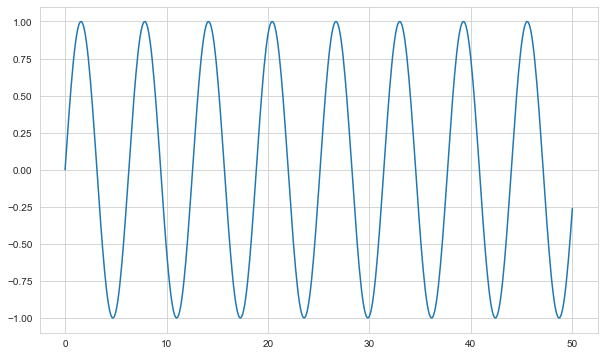

In [5]:
plt.plot(x,y);

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

- Sırayı bozmamamız lazım. Sırayı bozarsam her şey bozulur. Sıranın son kısmından test'e ayıracağım. **SIRA ÖNEMLİ**

In [8]:
len(df)

501

In [9]:
test_percent = 0.15

In [10]:
len(df)*test_percent

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

- Time series generator: 5 tane datayı al, altıncıyı tahmin et gibi mantığı işleyen bir fonksiyondur.
- Projede işe yaramadığını göreceğiz.
- teimeseriesgenerator'u tahmin için kullanacağımız pencereyi ve datayı ayarlamak için kullanıyoruz (Matt-Instructor)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [21]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size)

- Target ve train **AYNI DATA**
- teimeseriesgenerator'u tahmin için kullanacağımız pencereyi ve datayı ayarlamak için kullanıyoruz (Matt-Instructor)
- batch_size açıklandı ama tekrar et. 2 verirsek 1 ve 2 yi alır onlardan 3 ü tahmin et gibi.
- stride default 1 dir ve o yüzden 424 tane generate edecek.

In [22]:
len(train_scaled)

426

In [23]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

424

len(generator) # = (len(train)-lenght)/(batch_size*stride) 
- train_scaled 426 satırdı fakat generator bana 424 adet data üretmiş. çünkü benim sequence uzunluğum 2. 
- yani eğitim yaparken kaydırmayı 2 adımda yaptığı için 2 değer kayıp oldu.
- (örneğin ilk başta 0-3 indeks arasındaki datayı alıp 4. indeksi tahmin etti. sonra 2-5 indeksler arasını alıp 5. indeksi tahmin etti)

In [24]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [25]:
generator[1]

(array([[[0.54991622],
         [0.59933458]]]),
 array([[0.64776041]]))

In [26]:
generator[2]

(array([[[0.59933458],
         [0.64776041]]]),
 array([[0.69470985]]))

In [27]:
# What does the first batch look like?
X, y = generator[0]

In [28]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


In [29]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [30]:
gen = pd.DataFrame(generator, columns = ["X", "y"])  # X_train ve y_train olarak bildiğimiz klasik yapıya döktü.

In [31]:
gen.head()


,X,y
0,"[[[0.4999991159163256], [0.5499162248393211]]]",[[0.5993345785103605]]
1,"[[[0.5499162248393211], [0.5993345785103605]]]",[[0.6477604050750987]]
2,"[[[0.5993345785103605], [0.6477604050750987]]]",[[0.6947098496819506]]
3,"[[[0.6477604050750987], [0.6947098496819506]]]",[[0.7397138089998276]]
4,"[[[0.6947098496819506], [0.7397138089998276]]]",[[0.782322618343557]]


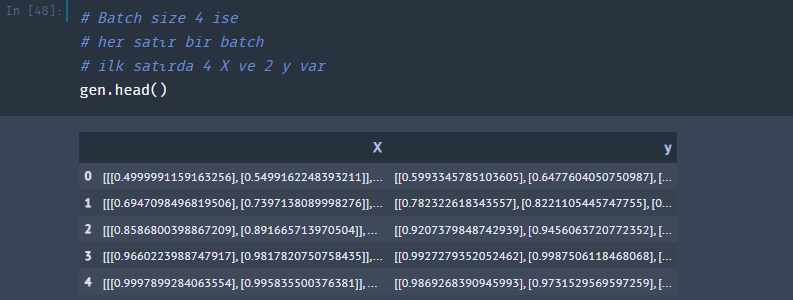

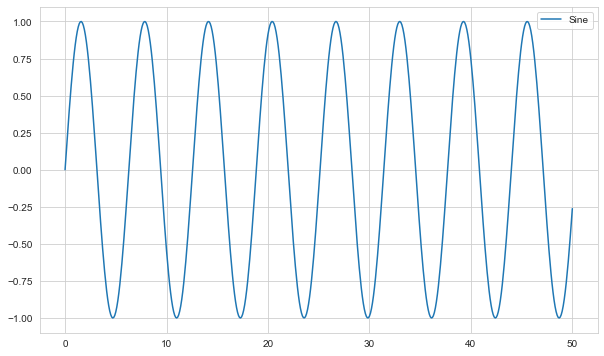

In [32]:
df.plot();

The more length the more training time

In [33]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

Datam küçük olduğu için batch_size 1. Daha iyi skor verir. Ama gerçek datalarda daha uzun datalarda çalışınca batch size ile mecburen oynayacağız.

In [34]:
# What does the first batch look like?
X, y = generator[0]

In [35]:
print(f'Given the Array: \n{X.flatten()}')  # gösterimi daha rahat olsun diye flatten yaptık. Yoksa array içinde çıkacaktı.
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [37]:
# We're only using one feature in our time series
n_features = 1

In [38]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 64, activation = "tanh", input_shape=(length, n_features)))  # shape = sütun ve satır sayısı gibi oldu

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')  # loss value için continuous veri ile cont. veri karşılaştırmak için mse seçtik. Reg de olduğu gibi.

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [40]:
(64*64) + (64 + 64)  # 64 tane input var, buradan 64 tane hidden layer'a parametreler geliyor.

4224

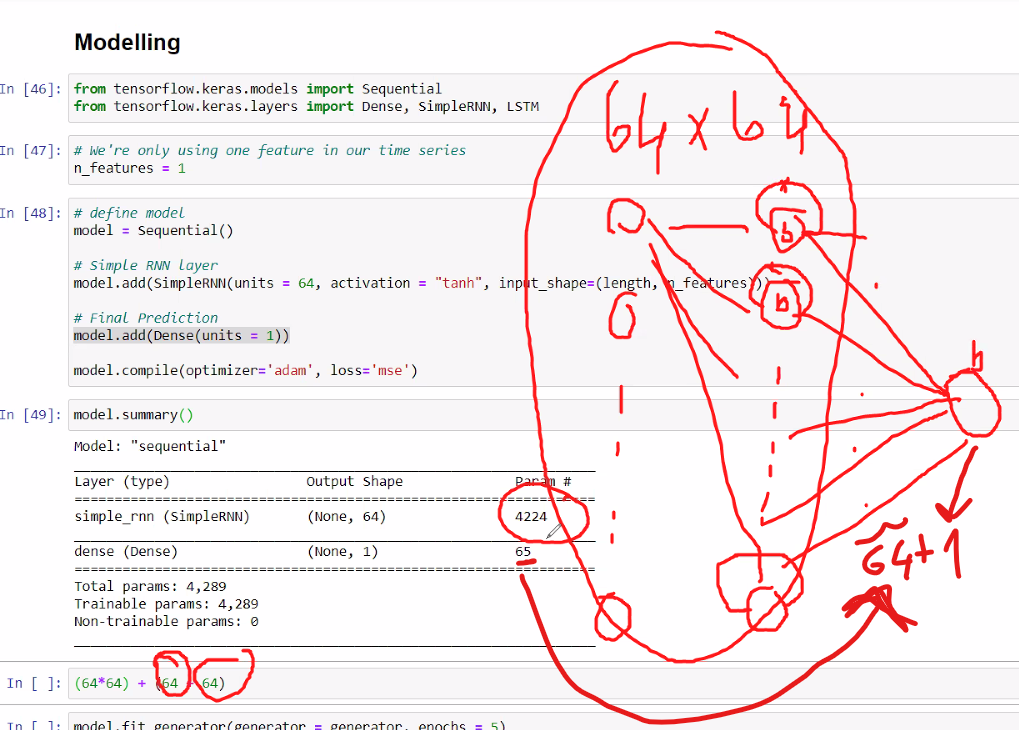

In [41]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 5s 12ms/step - loss: 0.0080
Epoch 2/5
362/362 [==============================] - 5s 14ms/step - loss: 0.0023
Epoch 3/5
362/362 [==============================] - 4s 12ms/step - loss: 5.5924e-05
Epoch 4/5
362/362 [==============================] - 5s 12ms/step - loss: 6.7841e-06
Epoch 5/5
362/362 [==============================] - 4s 12ms/step - loss: 1.5921e-04


In [42]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) (426 - 64) / (1 * 1) = 362

362

In [43]:
len(train_scaled)

426

In [44]:
batch_size

1

In [45]:
length

64

- Neden 362 tane oldu. Çünkü generatorun "len(generator)" 362 verir.

___

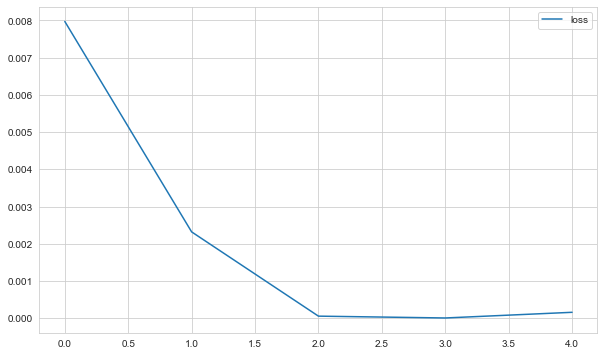

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## Evaluate on Test Data

In [47]:
first_eval_batch = train_scaled[-length:]

In [51]:
length

64

In [50]:
train_scaled[-length:]

array([[1.27922981e-03],
       [7.34597031e-03],
       [1.83351382e-02],
       [3.41369333e-02],
       [5.45934694e-02],
       [7.95003514e-02],
       [1.08608718e-01],
       [1.41627728e-01],
       [1.78227467e-01],
       [2.18042242e-01],
       [2.60674236e-01],
       [3.05697486e-01],
       [3.52662133e-01],
       [4.01098922e-01],
       [4.50523890e-01],
       [5.00443198e-01],
       [5.50358069e-01],
       [5.99769769e-01],
       [6.48184595e-01],
       [6.95118799e-01],
       [7.40103433e-01],
       [7.82689024e-01],
       [8.22450070e-01],
       [8.58989293e-01],
       [8.91941605e-01],
       [9.20977757e-01],
       [9.45807630e-01],
       [9.66183132e-01],
       [9.81900676e-01],
       [9.92803220e-01],
       [9.98781828e-01],
       [9.99776764e-01],
       [9.95778087e-01],
       [9.86825751e-01],
       [9.73009203e-01],
       [9.54466495e-01],
       [9.31382900e-01],
       [9.03989060e-01],
       [8.72558686e-01],
       [8.37405820e-01],


In [52]:
first_eval_batch.shape

(64, 1)

In [ ]:
generator[0][0].shape  # array lerin içine girmek için indexedik ve istediğimiz format bu olmalı.

In [56]:
len(generator)

362

In [57]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))  # reshape yapmak için başına 1 koyup boyutunu artırıyorum.

In [58]:
first_eval_batch.shape

(1, 64, 1)

In [63]:
#first_eval_batch

In [59]:
model.predict(first_eval_batch)

array([[0.00974373]], dtype=float32)

In [61]:
test_scaled[0]

array([0.00885189])

In [64]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [65]:
current_batch.shape

(1, 64, 1)

In [66]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [71]:
np.append(current_batch[:,1:,:], [[[0.0082]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [72]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [73]:
length, n_features

(64, 1)

In [74]:
len(test)

75

In [75]:
current_pred

array([0.37702346], dtype=float32)

In [76]:
# current_batch

In [77]:
test_predictions

[array([0.00974373], dtype=float32),
 array([0.02133554], dtype=float32),
 array([0.03769218], dtype=float32),
 array([0.05881219], dtype=float32),
 array([0.08399466], dtype=float32),
 array([0.11321835], dtype=float32),
 array([0.14641365], dtype=float32),
 array([0.18307124], dtype=float32),
 array([0.2226446], dtype=float32),
 array([0.26519594], dtype=float32),
 array([0.31032568], dtype=float32),
 array([0.3572976], dtype=float32),
 array([0.40569764], dtype=float32),
 array([0.45495412], dtype=float32),
 array([0.505025], dtype=float32),
 array([0.55483544], dtype=float32),
 array([0.60425293], dtype=float32),
 array([0.6523318], dtype=float32),
 array([0.6992001], dtype=float32),
 array([0.7433722], dtype=float32),
 array([0.7848848], dtype=float32),
 array([0.8237341], dtype=float32),
 array([0.8588123], dtype=float32),
 array([0.89030033], dtype=float32),
 array([0.9177179], dtype=float32),
 array([0.9408059], dtype=float32),
 array([0.95916617], dtype=float32),
 array([0.972

In [78]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [79]:
true_predictions = scaler.inverse_transform(test_predictions)  # unscaled haline çeviriyoruz

In [80]:
true_predictions

array([[-0.98050291],
       [-0.95731946],
       [-0.92460645],
       [-0.88236677],
       [-0.83200223],
       [-0.77355532],
       [-0.70716525],
       [-0.63385066],
       [-0.55470459],
       [-0.46960259],
       [-0.37934382],
       [-0.28540074],
       [-0.18860143],
       [-0.09008927],
       [ 0.01005175],
       [ 0.10967177],
       [ 0.20850596],
       [ 0.30466298],
       [ 0.39839876],
       [ 0.48674227],
       [ 0.56976682],
       [ 0.64746478],
       [ 0.71762055],
       [ 0.78059617],
       [ 0.83543081],
       [ 0.88160652],
       [ 0.91832674],
       [ 0.94534268],
       [ 0.9622084 ],
       [ 0.968569  ],
       [ 0.96509419],
       [ 0.95091222],
       [ 0.9277982 ],
       [ 0.89512391],
       [ 0.85364453],
       [ 0.80406901],
       [ 0.74699122],
       [ 0.68292366],
       [ 0.61235256],
       [ 0.53663   ],
       [ 0.45550205],
       [ 0.37036918],
       [ 0.28165279],
       [ 0.1900003 ],
       [ 0.09651224],
       [ 0

In [81]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [82]:
test['Predictions'] = true_predictions

In [83]:
test

,Sine,Predictions
42.600,-0.982,-0.981
42.700,-0.959,-0.957
42.800,-0.925,-0.925
42.900,-0.883,-0.882
43.000,-0.832,-0.832
...,...,...
49.600,-0.617,-0.594
49.700,-0.536,-0.513
49.800,-0.449,-0.429
49.900,-0.357,-0.339


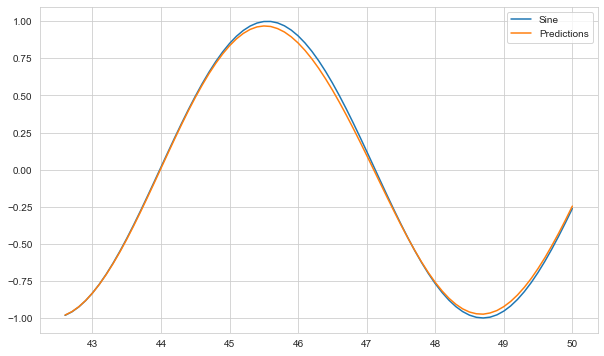

In [84]:
test.plot();

## Early Stopping and Validation Generator

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [87]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

In [88]:
len(validation_generator)

11

## LSTM

In [89]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 64, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [90]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 18s 38ms/step - loss: 0.0126 - val_loss: 1.5219e-04
Epoch 2/20
362/362 [==============================] - 10s 27ms/step - loss: 6.6258e-04 - val_loss: 2.8280e-05
Epoch 3/20
362/362 [==============================] - 10s 28ms/step - loss: 1.0362e-04 - val_loss: 1.2317e-05
Epoch 4/20
362/362 [==============================] - 15s 40ms/step - loss: 1.1718e-04 - val_loss: 2.8292e-05
Epoch 5/20
362/362 [==============================] - 13s 37ms/step - loss: 1.4464e-04 - val_loss: 1.3521e-05


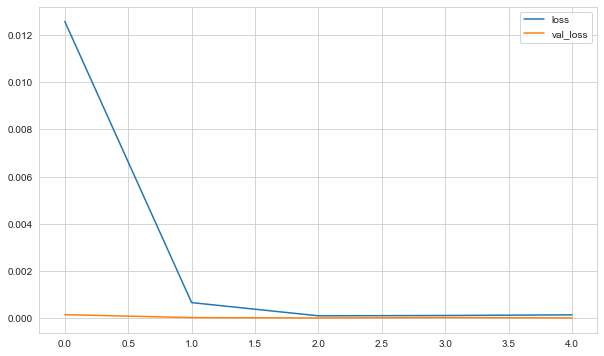

In [91]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [92]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [93]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test

,Sine,Predictions,LSTM Predictions
42.600,-0.982,-0.981,-0.972
42.700,-0.959,-0.957,-0.946
42.800,-0.925,-0.925,-0.912
42.900,-0.883,-0.882,-0.868
43.000,-0.832,-0.832,-0.816
...,...,...,...
49.600,-0.617,-0.594,-0.680
49.700,-0.536,-0.513,-0.605
49.800,-0.449,-0.429,-0.525
49.900,-0.357,-0.339,-0.440


<AxesSubplot:>

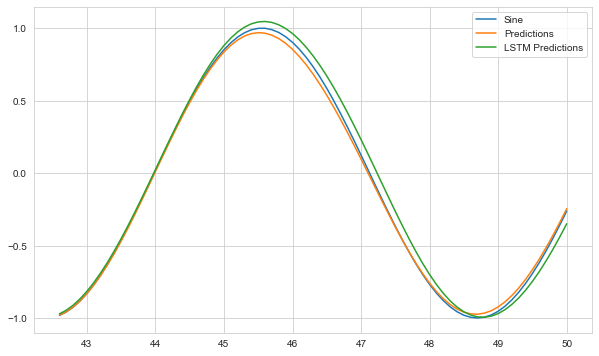

In [94]:
test.plot()

## Retrain and Forecasting

In [95]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [96]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [97]:
model = Sequential()
model.add(LSTM(64, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 16s 29ms/step - loss: 0.0113
Epoch 2/6
437/437 [==============================] - 13s 29ms/step - loss: 5.0136e-05
Epoch 3/6
437/437 [==============================] - 13s 29ms/step - loss: 1.5918e-04 1s - loss: 1.723 - ETA: 1s - - ETA: 0s - loss: 1.6023e-
Epoch 4/6
437/437 [==============================] - 13s 30ms/step - loss: 1.2277e-04
Epoch 5/6
437/437 [==============================] - 12s 28ms/step - loss: 2.5201e-04
Epoch 6/6
437/437 [==============================] - 13s 30ms/step - loss: 1.2419e-04


In [99]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(64):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

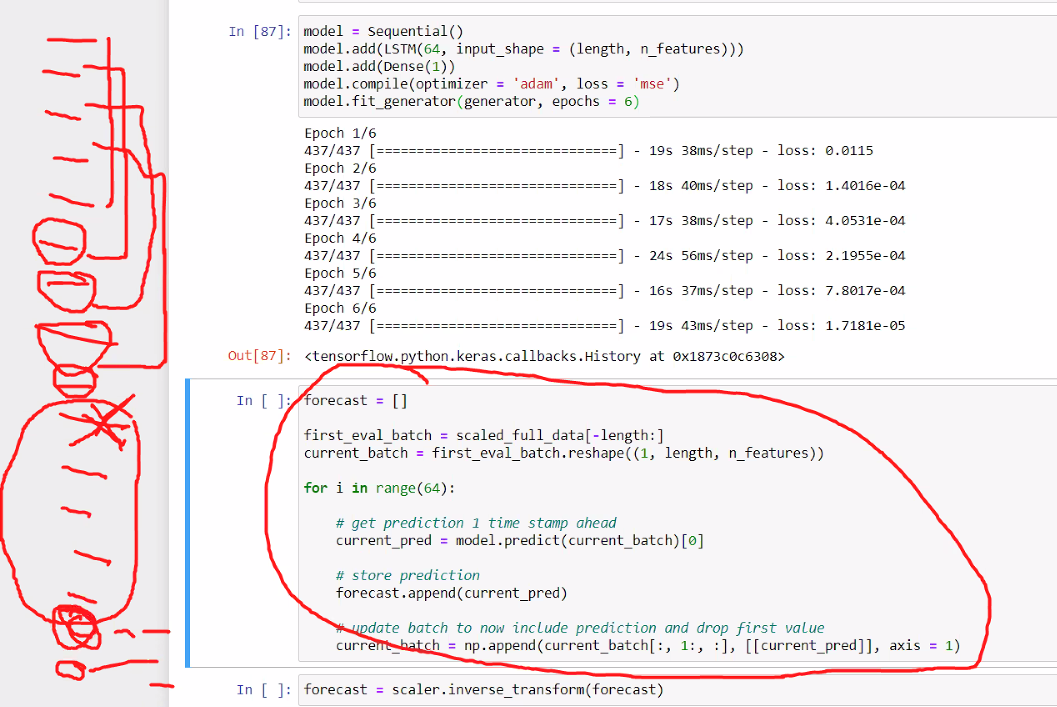

bu for o veriyi (current batch) alıp en sona ekliyor yani, biz de o veriyi manuel olarak alıyoruz ve append e  ekliyoruz değil mi?

In [100]:
forecast = scaler.inverse_transform(forecast)

In [101]:
forecast

array([[-0.17583231],
       [-0.07638544],
       [ 0.0235534 ],
       [ 0.12317771],
       [ 0.22156571],
       [ 0.31772762],
       [ 0.41063442],
       [ 0.49924615],
       [ 0.58253856],
       [ 0.65952545],
       [ 0.72928247],
       [ 0.79096956],
       [ 0.84385038],
       [ 0.88730837],
       [ 0.92085813],
       [ 0.94414976],
       [ 0.95697253],
       [ 0.95924857],
       [ 0.95102642],
       [ 0.93247116],
       [ 0.90384877],
       [ 0.86551864],
       [ 0.81791815],
       [ 0.76155479],
       [ 0.6969993 ],
       [ 0.62487599],
       [ 0.54586423],
       [ 0.46069751],
       [ 0.37015973],
       [ 0.27509264],
       [ 0.17639374],
       [ 0.07501802],
       [-0.02802346],
       [-0.13166831],
       [-0.23481111],
       [-0.33631718],
       [-0.43503909],
       [-0.52983755],
       [-0.61960503],
       [-0.70329071],
       [-0.77992292],
       [-0.84863046],
       [-0.90865964],
       [-0.95938484],
       [-1.00031623],
       [-1

In [102]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


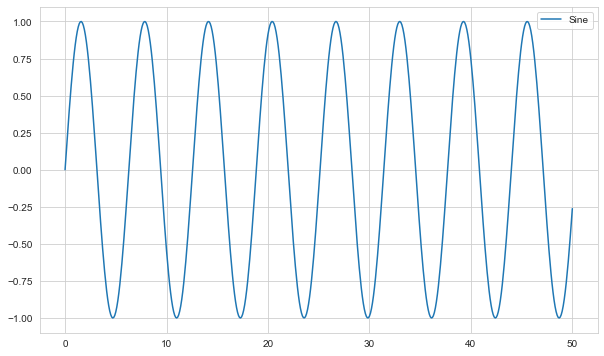

In [107]:
df.plot();

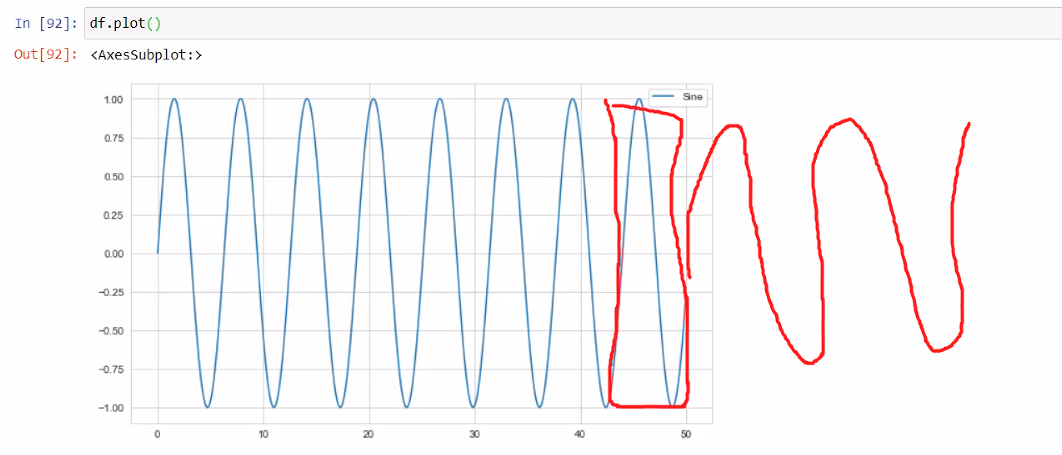

In [103]:
len(forecast)

64

In [104]:
64*0.1  # verim 0.1 'er aralıklar ile artıyordu. ve ben 50.1 ile 56.5 arasına step sayısı .1 olacak şekilde forecast oluşturuyorum.

6.4

In [105]:
forecast_index = np.arange(50.1, 56.5, step = 0.1)

In [106]:
len(forecast_index)

64

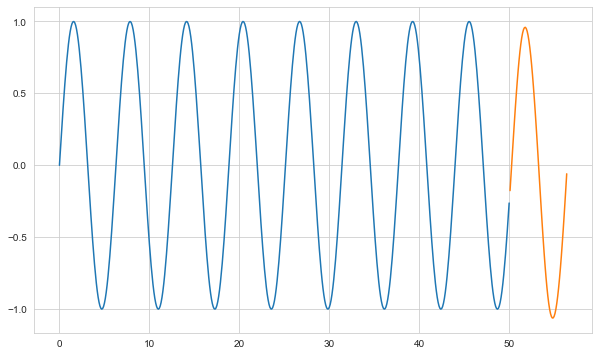

In [108]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)